You are given an m x n integer matrix grid and an array queries of size k.

Find an array answer of size k such that for each integer queries[i] you start in the top left cell of the matrix and repeat the following process:

    If queries[i] is strictly greater than the value of the current cell that you are in, then you get one point if it is your first time visiting this cell, and you can move to any adjacent cell in all 4 directions: up, down, left, and right.
    Otherwise, you do not get any points, and you end this process.

After the process, answer[i] is the maximum number of points you can get. Note that for each query you are allowed to visit the same cell multiple times.

Return the resulting array answer.

 

Example 1:

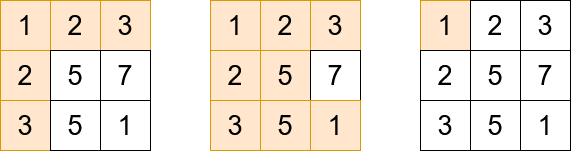

Input: grid = [[1,2,3],[2,5,7],[3,5,1]], queries = [5,6,2]
Output: [5,8,1]
Explanation: The diagrams above show which cells we visit to get points for each query.

Example 2:

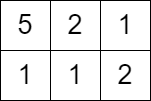

Input: grid = [[5,2,1],[1,1,2]], queries = [3]
Output: [0]
Explanation: We can not get any points because the value of the top left cell is already greater than or equal to 3.

 

Constraints:

    m == grid.length
    n == grid[i].length
    2 <= m, n <= 1000
    4 <= m * n <= 105
    k == queries.length
    1 <= k <= 104
    1 <= grid[i][j], queries[i] <= 106



In [ ]:
class Solution:
    def maxPoints(self, grid: List[List[int]], queries: List[int]) -> List[int]:
        cand = []
        m, n = len(grid), len(grid[0])
        visited = [[False for _ in range(n)] for _ in range(m)]
        scores = defaultdict(int)
        heapq.heappush(cand, [grid[0][0], 0, 0])
        while cand:
            score, x, y = heapq.heappop(cand)
            if visited[x][y]:
                continue
            q = deque([[x, y]])
            while q:
                x, y = q.popleft()
                if visited[x][y]:
                    continue
                visited[x][y] = True
                scores[score] += 1
                for dx, dy in [[0, 1], [0, -1], [1, 0], [-1, 0]]:
                    if 0 <= x + dx < m and 0 <= y + dy < n:
                        if grid[x + dx][y + dy] <= score:
                            q.append([x + dx, y + dy])
                        else:
                            heapq.heappush(cand, [grid[x + dx][y + dy], x + dx,  y + dy])
        scores_arr = [0]
        for i in range(1, max(max(scores), max(queries))):
            scores_arr.append(scores_arr[-1] + scores[i])
        return [scores_arr[q - 1] for q in queries]

In [ ]:
from queue import PriorityQueue


class Solution:
    def maxPoints(self, grid: List[List[int]], queries: List[int]) -> List[int]:
        row_count, col_count = len(grid), len(grid[0])
        result = [0] * len(queries)
        # Directions for movement (right, down, left, up)
        DIRECTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]

        # Store queries along with their original indices to restore order
        # later
        sorted_queries = sorted([(val, idx) for idx, val in enumerate(queries)])

        # Min-heap (priority queue) to process cells in increasing order of
        # value
        min_heap = PriorityQueue()
        visited = [[False] * col_count for _ in range(row_count)]
        # Keeps track of the number of cells processed
        total_points = 0
        # Start from the top-left cell
        min_heap.put((grid[0][0], 0, 0))
        visited[0][0] = True

        # Process queries in sorted order
        for query_value, query_index in sorted_queries:
            # Expand the cells that are smaller than the current query value
            while not min_heap.empty() and min_heap.queue[0][0] < query_value:
                cellValue, current_row, current_col = min_heap.get()

                # Increment count of valid cells
                total_points += 1

                # Explore all four possible directions
                for row_offset, col_offset in DIRECTIONS:
                    new_row, new_col = (
                        current_row + row_offset,
                        current_col + col_offset,
                    )

                    # Check if the new cell is within bounds and not visited
                    if (
                        new_row >= 0
                        and new_col >= 0
                        and new_row < row_count
                        and new_col < col_count
                        and not visited[new_row][new_col]
                    ):
                        min_heap.put((grid[new_row][new_col], new_row, new_col))
                        # Mark as visited
                        visited[new_row][new_col] = True
            # Store the result for this query
            result[query_index] = total_points

        return result